<a href="https://colab.research.google.com/github/juyeon-shin/CLUB-D.N.A./blob/main/%EC%A0%9C%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 모듈 & 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
plt.rc('font', family='NanumGothic') 

import warnings
warnings.filterwarnings('ignore')

In [3]:
total = pd.read_csv('/content/drive/MyDrive/202110 데이콘_가스공급량 수요예측 모델개발/데이터/한국가스공사_시간별 공급량_20181231.csv',encoding='cp949')
total

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


## 전처리 (데이콘 베이스 라인 기반)

In [4]:
total['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [5]:
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i
total['구분'] = total['구분'].map(d_map)

In [6]:
total['연월일'] = pd.to_datetime(total['연월일'])

In [7]:
total['year'] = total['연월일'].dt.year
total['month'] = total['연월일'].dt.month
total['day'] = total['연월일'].dt.day
total['weekday'] = total['연월일'].dt.weekday

In [8]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

In [9]:
train = total[total['year'].isin(train_years)]
val = total[total['year'].isin(val_years)]

In [10]:
features = ['구분', 'month', 'day', 'weekday', '시간']
train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

In [11]:
train

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1
3,2013-01-01,4,0,2243.969,2013,1,1,1
4,2013-01-01,5,0,2344.105,2013,1,1,1
...,...,...,...,...,...,...,...,...
306763,2017-12-31,20,6,517.264,2017,12,31,6
306764,2017-12-31,21,6,530.896,2017,12,31,6
306765,2017-12-31,22,6,506.287,2017,12,31,6
306766,2017-12-31,23,6,470.638,2017,12,31,6


In [12]:
val

,연월일,시간,구분,공급량,year,month,day,weekday
306768,2018-01-01,1,0,1765.008,2018,1,1,0
306769,2018-01-01,2,0,1679.186,2018,1,1,0
306770,2018-01-01,3,0,1610.885,2018,1,1,0
306771,2018-01-01,4,0,1604.123,2018,1,1,0
306772,2018-01-01,5,0,1711.506,2018,1,1,0
...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,6,681.033,2018,12,31,0
368084,2018-12-31,21,6,669.961,2018,12,31,0
368085,2018-12-31,22,6,657.941,2018,12,31,0
368086,2018-12-31,23,6,610.953,2018,12,31,0


## EDA

### 20211108 EDA

In [13]:
total

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1
3,2013-01-01,4,0,2243.969,2013,1,1,1
4,2013-01-01,5,0,2344.105,2013,1,1,1
...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,6,681.033,2018,12,31,0
368084,2018-12-31,21,6,669.961,2018,12,31,0
368085,2018-12-31,22,6,657.941,2018,12,31,0
368086,2018-12-31,23,6,610.953,2018,12,31,0


In [14]:
#구분 함수 생성

def division_data(total,i):
    div_i = total[total['구분'] == i]
    return div_i

In [15]:
div_0 = division_data(total,0)
div_0

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1
3,2013-01-01,4,0,2243.969,2013,1,1,1
4,2013-01-01,5,0,2344.105,2013,1,1,1
...,...,...,...,...,...,...,...,...
315523,2018-12-31,20,0,3040.868,2018,12,31,0
315524,2018-12-31,21,0,2973.577,2018,12,31,0
315525,2018-12-31,22,0,2840.272,2018,12,31,0
315526,2018-12-31,23,0,2692.385,2018,12,31,0


In [16]:
#구분에 따른 EDA 함수 생성

def EDA(div):
    for i in range(6):
        div_0 = division_data(total,i)
        
        div_group = div_0.groupby(['시간'], as_index=False).sum()
        plt.plot(div_group['시간'],div_group['공급량'],label='구분 %d'%i)
        plt.title('구분 별 시간 공급량 합계')
        plt.legend(loc='upper left')
        
    plt.show()
    
    for i in range(6):
        div_0 = division_data(total,i)
        
        div_group = div_0.groupby(['year'], as_index=False).sum()
        plt.plot(div_group['year'],div_group['공급량'],label='구분 %d'%i)
        plt.title('구분 별 연간 공급량 합계')
        plt.legend(loc='upper left')
        
    plt.show()
    
    for i in range(6):
        div_0 = division_data(total,i)
        
        div_group = div_0.groupby(['month'], as_index=False).sum()
        plt.plot(div_group['month'],div_group['공급량'],label='구분 %d'%i)
        plt.title('구분 별 월간 공급량 합계')
        plt.legend(loc='upper left')
        
    plt.show()
    
    for i in range(6):
        div_0 = division_data(total,i)
        
        div_group = div_0.groupby(['day'], as_index=False).sum()
        plt.plot(div_group['day'],div_group['공급량'],label='구분 %d'%i)
        plt.title('구분 별 일간 공급량 합계')
        plt.legend(loc='upper left')
        
    plt.show()
    
    for i in range(6):
        div_0 = division_data(total,i)
        
        div_group = div_0.groupby(['weekday'], as_index=False).sum()
        plt.plot(div_group['weekday'],div_group['공급량'],label='구분 %d'%i)
        plt.title('구분 별 요일별 공급량 합계')
        plt.legend(loc='upper left')
        
    plt.show()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


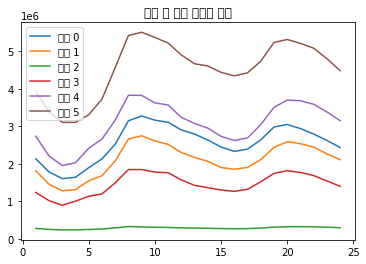

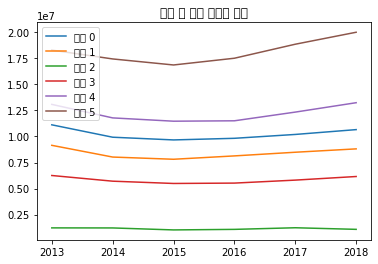

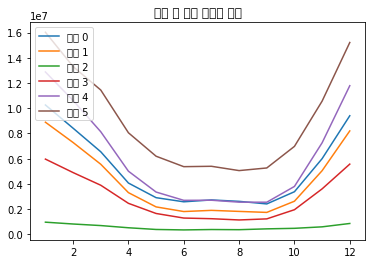

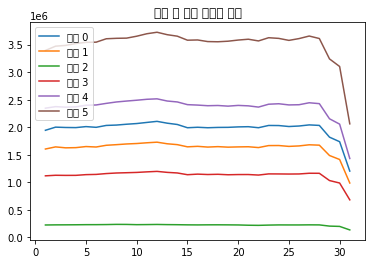

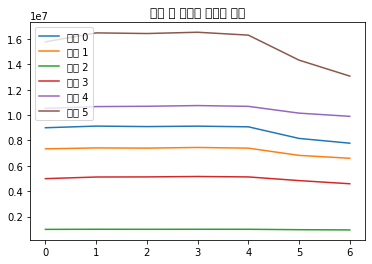

In [17]:
EDA(total)

+ 그래프의 개형이 비슷하다
+ 공급량의 차이가 있다는 것만 보여줌

### 20211110 EDA

In [18]:
def total_group(i):
    a = total.groupby([i]).sum()
    return a

In [20]:
total_group(i)

KeyError: ignored

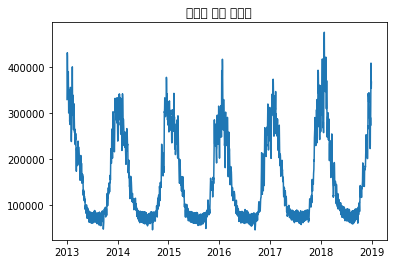

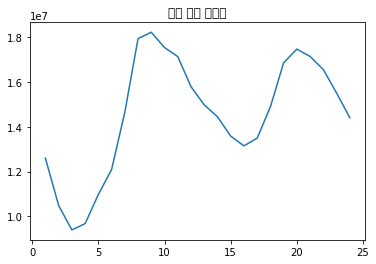

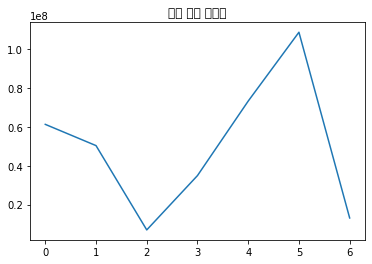

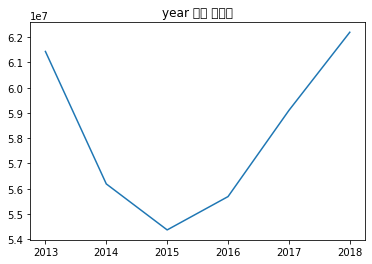

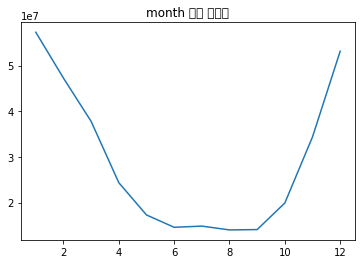

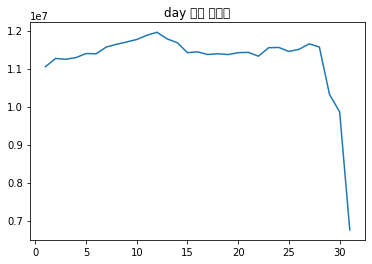

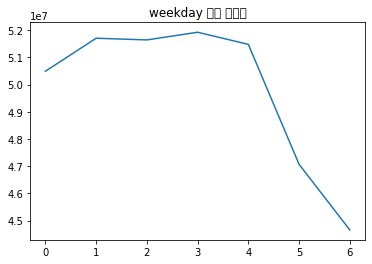

In [21]:
for i in total.columns:
    if i != '공급량':
        x = total_group(i).index
        plt.plot(x,total_group(i)['공급량'])
        plt.title(i+' 기준 공급량')
        plt.show()

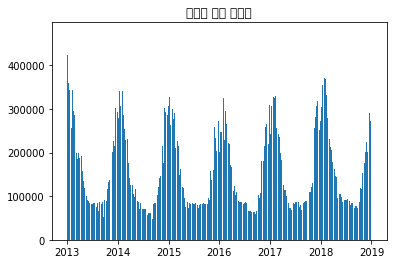

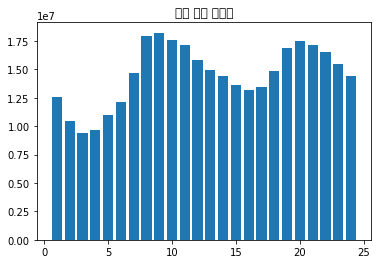

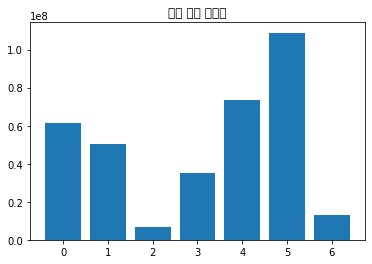

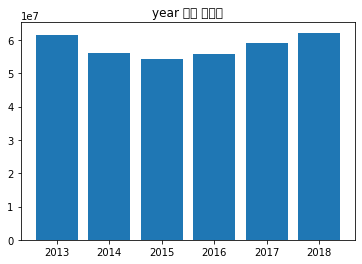

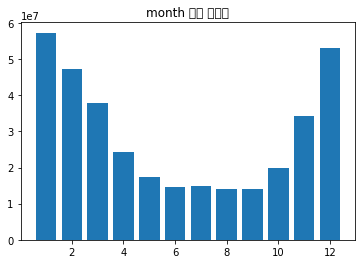

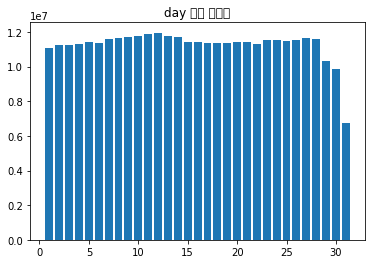

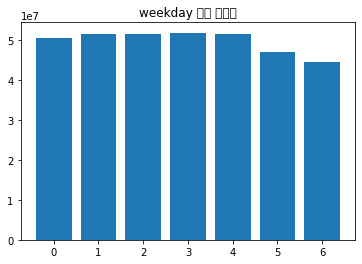

In [22]:
for i in total.columns:
    if i != '공급량':
        x = total_group(i).index
        plt.bar(x,total_group(i)['공급량'])
        plt.title(i+' 기준 공급량')
        plt.show()